In [4]:
# %pip install bing-image-downloader

In [5]:
# from bing_image_downloader import downloader

In [6]:
# downloader.download(
#         "mango",
#         limit=100,
#         output_dir="./mango",
#         adult_filter_off=True,
#         force_replace=False,
#         timeout=60,
#         verbose=True,
#     )

In [7]:
# downloader.download(
#     "strawberry",
#     limit=100,
#     output_dir="./strawberry",
#     adult_filter_off=True,
#     force_replace=False,
#     timeout=60,
#     verbose=True,
# )

In [8]:
import os


# Define location of dataset
def rename_path(folder, prefix_name):
    files = os.listdir(folder)

    # Iterate over each file and rename it with the prefix "mango"
    for file_name in files:
        # Construct the new file name with the "dog_" prefix
        new_file_name = prefix_name + file_name

        # Construct the full paths for the old and new file names
        old_file_path = os.path.join(folder, file_name)
        new_file_path = os.path.join(folder, new_file_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

In [9]:
mango_path="E:/ML/ML assignments/ML-assignment-4/mango/mango"
strawberry_path="E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry"


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_15192\1866634196.py:2: SyntaxWarning: invalid escape sequence '\M'
  strawberry_path="E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry"


In [10]:
rename_path("E:/ML/ML assignments/ML-assignment-4/mango/mango", "mango_")
rename_path("E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry", "strawberry_")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_15192\783167520.py:2: SyntaxWarning: invalid escape sequence '\M'
  rename_path("E:\ML\ML assignments\ML-assignment-4\strawberry\strawberry", "strawberry_")


In [11]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import shuffle

# create directories
dataset_home = "dataset_mangoes_vs_strawberries/"
subdirs = ["train/", "test/"]
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ["mangoes/", "strawberries/"]
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(49)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directories = [
    mango_path,
    strawberry_path,
]
for src_directory in src_directories:
    i = 1
    files = os.listdir(src_directory)
    shuffle(files)
    for file in files:
        src = src_directory + "/" + file
        dst_dir = "train/"
        if i > 80:
            dst_dir = "test/"
        if file.startswith("strawberry"):
            dst = dataset_home + dst_dir + "strawberries/" + file
            copyfile(src, dst)
        elif file.startswith("mango"):
            dst = dataset_home + dst_dir + "mangoes/" + file
            copyfile(src, dst)
        i += 1

In [12]:
# import shutil
# shutil.rmtree('/content/dataset_dogs_vs_horses')

In [13]:
# shutil.rmtree('/content/mango')
# shutil.rmtree('/content/strawberry')

In [14]:
from matplotlib import pyplot
from matplotlib.image import imread


# define location of dataset
def plot_images(folder, animal_name):
    files = os.listdir(folder)
    # plot first few images
    i = 0
    for file_name in files[:9]:
        pyplot.suptitle(animal_name)
        pyplot.subplot(330 + 1 + i)
        image = imread(os.path.join(folder, file_name))
        # plot raw pixel data
        pyplot.imshow(image)
        i += 1
    # show the figure
    pyplot.show()

In [15]:
dataset_train_path="E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train"
dataset_test_path="E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test"

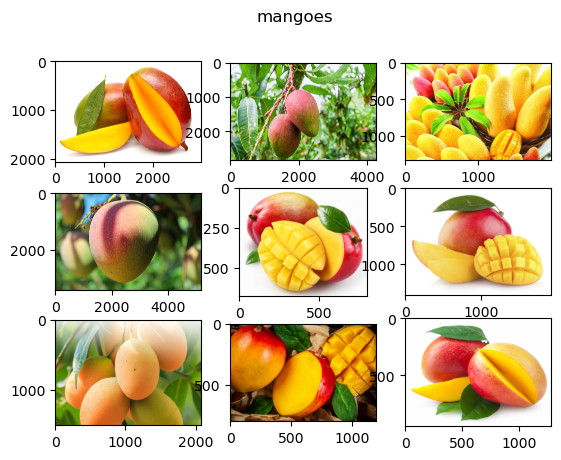

In [16]:


plot_images(dataset_train_path+"/mangoes", "mangoes")

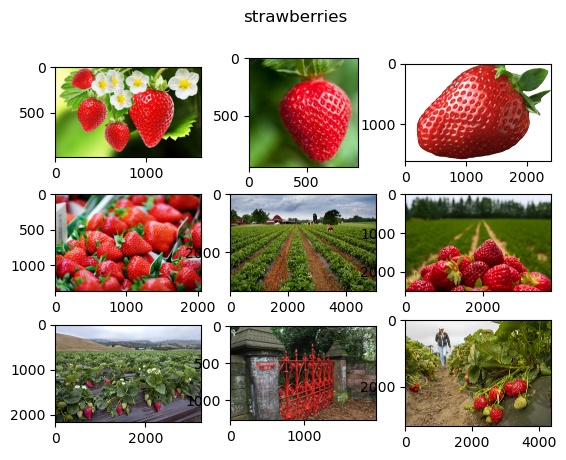

In [17]:
plot_images(dataset_train_path+"/strawberries", "strawberries")

In [18]:
folder = dataset_train_path
for file in listdir(folder):
    print(file)

mangoes
strawberries


In [19]:
# load mangoes vs strawberries dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def pre_processing(src_folder):
    photos, labels = list(), list()
    # enumerate files in the directory
    for folder in listdir(src_folder):
        folder_path = os.path.join(src_folder, folder)
        for file in listdir(folder_path):
            # determine class
            output = 0.0
            if file.startswith("mango"):
                output = 1.0
            # load image
            photo = load_img(os.path.join(folder_path, file), target_size=(200, 200))
            # convert to numpy array
            photo = img_to_array(photo)
            # store
            photos.append(photo)
            labels.append(output)
    # convert to a numpy arrays
    photos = asarray(photos)
    labels = asarray(labels)
    print(photos.shape, labels.shape)
    # save the reshaped photos
    if "train" in src_folder:
        save("mango_vs_strawberry_photos.npy", photos)
        save("mango_vs_strawberry_labels.npy", labels)
    else:
        save("mango_vs_strawberry_photos.npy", photos)
        save("mango_vs_strawberry_labels.npy", labels)

In [20]:
src_folder_train = dataset_train_path
src_folder_test = dataset_test_path

In [21]:
pre_processing(src_folder_train)
pre_processing(src_folder_test)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(320, 200, 200, 3) (320,)
(80, 200, 200, 3) (80,)


In [22]:
for folder in listdir(src_folder_train):
    folder_path = os.path.join(src_folder_train, folder)
    i = 0
    print(folder_path)
    for file in listdir(folder_path):
        i += 1
    print(i)

for folder in listdir(src_folder_test):
    folder_path = os.path.join(src_folder_test, folder)
    i = 0
    print(folder_path)
    for file in listdir(folder_path):
        i += 1
    print(i)

E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train\mangoes
160
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/train\strawberries
160
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test\mangoes
40
E:/ML/ML assignments/ML-assignment-4/dataset_mangoes_vs_strawberries/test\strawberries
40


In [23]:
%pip install tensorflow
import tensorflow as tf   # noqa: E402

if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is not available. Switching to CPU.")


GPU is not available. Switching to CPU.


In [24]:
import tensorflow as tf

In [25]:
# baseline model for the mangoes vs strawberries dataset
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from time import time
import numpy as np
from tqdm.keras import TqdmCallback
from keras.callbacks import TensorBoard, Callback
from matplotlib import pyplot


# Define a function to set up the TensorBoard callback
def setup_tensorboard():
    return TensorBoard(
        log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True)


class PerIterationCallback(Callback):
    def __init__(self, logdir, test_iterator):
        self.logdir = logdir
        self.writer = tf.summary.create_file_writer(logdir)
        self.step = 0
        self.test_iterator = test_iterator

    def on_batch_end(self, batch_index, logs=None):
        if logs is not None:
            with self.writer.as_default():
                tf.summary.scalar(
                    "training_loss_vs_iterations", logs["loss"], step=self.step
                )
                tf.summary.scalar(
                    "training_accuracy_vs_iterations", logs["accuracy"], step=self.step
                )
                # Write image summaries
                self.write_image_summaries()
                self.writer.flush()
                self.step += 1

    def write_image_summaries(self):
        if self.step % 100 == 0:  # Adjust the frequency of writing image summaries as needed
            test_images, test_labels = next(iter(self.test_iterator))
            predicted_labels = self.model.predict(test_images)
            with self.writer.as_default():
                tf.summary.image(
                    "Test Images vs Predictions",
                    test_images,
                    step=self.step,
                    max_outputs=20,  # Number of images to display
                )

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model
def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name + '_image_label'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir, test_it)
    # fit model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it,
        steps=len(test_it),
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 80.000001


C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_15192\2804560393.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df = model_performance_df._append(


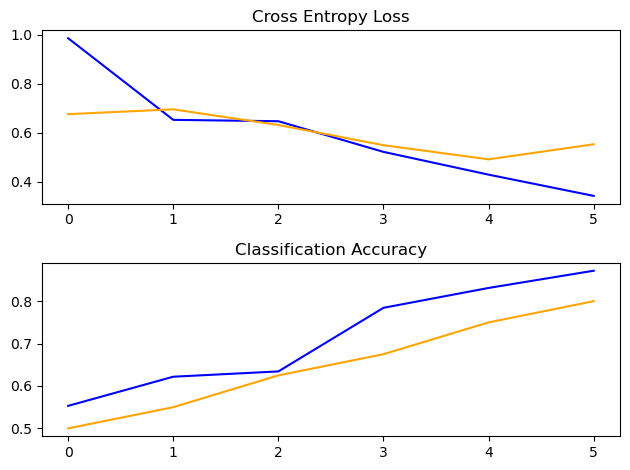

In [26]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_1_block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)

run_test_harness()

In [29]:
# baseline model for the mangoes vs strawberries dataset
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from time import time
from tqdm.keras import TqdmCallback
from keras.callbacks import TensorBoard, Callback


# Define a function to set up the TensorBoard callback
def setup_tensorboard():
    return TensorBoard(
        log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True)


class PerIterationCallback(Callback):
    def __init__(self, logdir):
        self.logdir = logdir
        self.writer = tf.summary.create_file_writer(logdir)
        self.step = 0

    def on_batch_end(self, batch_index, logs=None):
        if logs is not None:
            with self.writer.as_default():
                tf.summary.scalar(
                    "training_loss_vs_iterations", logs["loss"], step=self.step
                )
                tf.summary.scalar(
                    "training_accuracy_vs_iterations", logs["accuracy"], step=self.step
                )
                self.writer.flush()
                self.step += 1


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model
def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it,
        steps=len(test_it),
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)

One Block VGG Model

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 85.000002


C:\Users\Shivam Kumar\AppData\Local\Temp\ipykernel_15192\3944069523.py:122: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df = model_performance_df._append(


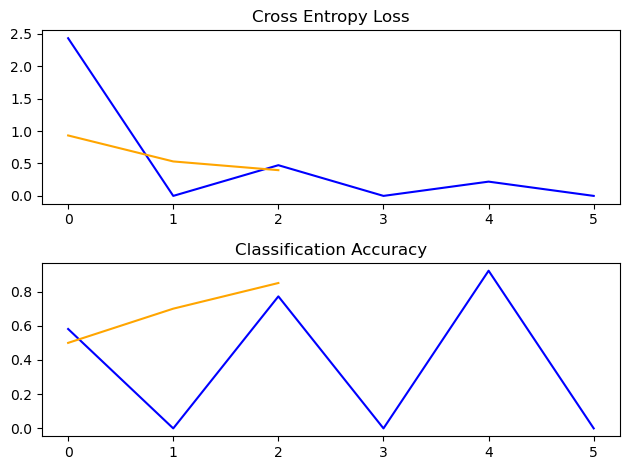

In [30]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_1_block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)

run_test_harness()

Three Block VGG Model

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 57.499999


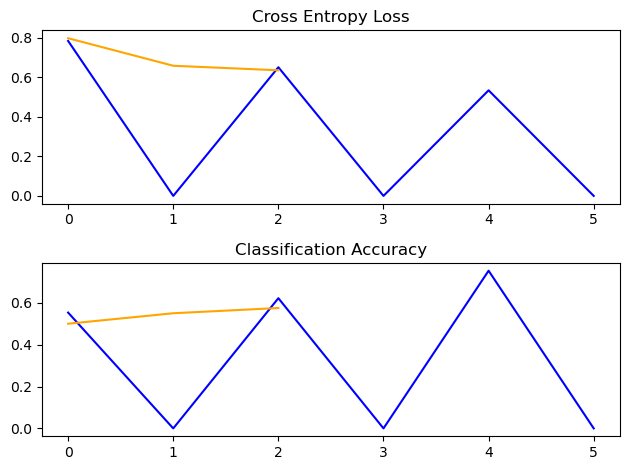

In [31]:
# define cnn model
def define_model():
    model = Sequential(name="vgg_3block")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


run_test_harness()

VGG3 + Data Augmentation

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

> 80.000001


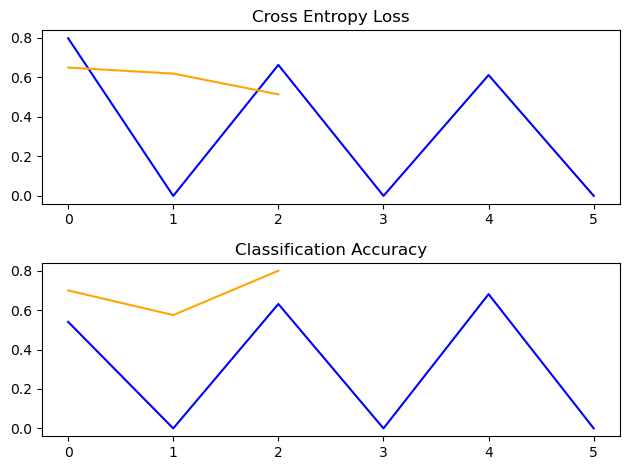

In [32]:
# baseline model with data augmentation for the mangoes vs strawberries dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# define cnn model
def define_model():
    model = Sequential(name="vgg_3blocks_data_aug")
    model.add(
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
            input_shape=(200, 200, 3),
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(
        Conv2D(
            128,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        )
    )
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()

    pyplot.show()


def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + model.name
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
    )
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = test_datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    print("> %.6f" % (test_acc * 100.0))

    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": model.name,  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }

    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )

    # learning curves
    summarize_diagnostics(history)


# entry point, run the test harness
run_test_harness()

In [33]:
print(model_performance_df.to_string())

                  Model  Training Time (s)  Training Loss  Training Accuracy  Testing Accuracy Trainable Parameters
0           vgg_1_block         204.174509            0.0                0.0             0.850             40961153
1            vgg_3block         176.714504            0.0                0.0             0.575             10333505
2  vgg_3blocks_data_aug         177.592637            0.0                0.0             0.800             10333505


VGG19 Model with tuning all layers

In [ ]:
# vgg19 model used for transfer learning on the mangoes and strawberries dataset
import sys
from time import time
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history["loss"], color="blue", label="train")
    pyplot.plot(history.history["val_loss"], color="orange", label="test")
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title("Classification Accuracy")
    pyplot.plot(history.history["accuracy"], color="blue", label="train")
    pyplot.plot(history.history["val_accuracy"], color="orange", label="test")

    pyplot.tight_layout()
    pyplot.show()


# run the test harness for evaluating a model

def run_test_harness():
    start_time = time()
    # Define model
    model = define_model()
    log_dir = './logs/' + 'vgg19_tuning_all_layers'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    
    # Create data generator with data augmentation
    train_datagen = ImageDataGenerator(
        featurewise_center=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
    )
    test_datagen = ImageDataGenerator(featurewise_center=True)
    
    # Specify imagenet mean values for centering
    train_datagen.mean = [123.68, 116.779, 103.939]
    test_datagen.mean = [123.68, 116.779, 103.939]
    
    # Prepare iterators
    train_it = train_datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = test_datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    
    # Fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, early_stopping_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    
    # Evaluate model
    _, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print("> %.6f" % (test_acc * 100.0))
    
    # Count the number of trainable parameters in the model
    trainable_params = model.count_params()
    
    # Create a dictionary to store results
    model_results = {
        "Model": 'vgg19_tuning_all_layers',
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(model_results, ignore_index=True)
    
    # Learning curves
    summarize_diagnostics(history)


# define cnn model
def define_model():
    # load model
    model = VGG19(include_top=False, input_shape=(200, 200, 3))
    # all layers trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    output = Dense(1, activation="sigmoid")(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# entry point, run the test harness
run_test_harness()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_140']. Received: the structure of inputs=*
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Shivam Kumar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_e

VGG19 with tuning only the final MLP layers

Found 159 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


  0%|          | 0/20 [00:00<?, ?epoch/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 20/20 [05:56<00:00, 17.80s/epoch, loss=2.88e-5, accuracy=1, val_loss=1.06, val_accuracy=0.975] 
0epoch [00:04, ?epoch/s]


> 97.500002


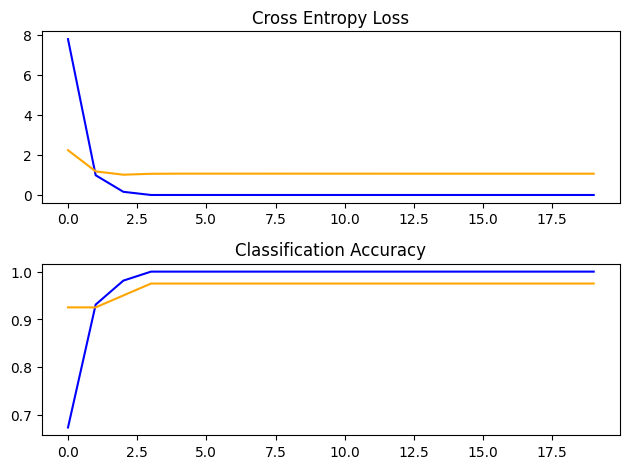

In [ ]:
# vgg19 model used for transfer learning on the mangoes and strawberries dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def run_test_harness():
    start_time = time()
    # define model
    model = define_model()
    log_dir = './logs/' + 'vgg19_tuning_mlp'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
        dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )
    print("> %.6f" % (test_acc * 100.0))
    # Create a dictionary to store results
    model_results = {
        "Model": 'vgg_19_tuning_mlp',  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )
    # learning curves
    summarize_diagnostics(history)

# define cnn model
def define_model():
    # load model
    model = VGG19(include_top=False, input_shape=(200, 200, 3))
    # mark loaded layers as not trainable
    for layer in model.layers[:-2]:  # exclude the last two layers (flatten and dense)
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    output = Dense(1, activation="sigmoid")(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


# entry point, run the test harness
run_test_harness()

In [ ]:
# Print the DataFrame containing results for all models trained so far
print(model_performance_df.to_string())

NameError: name 'model_performance_df' is not defined

In [ ]:
from tensorflow.keras.optimizers import SGD

def run_test_harness():
    start_time = time()
    # define MLP model
    model = define_model()
    log_dir = './logs/' + 'mlp_comparable_to_vgg16'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    per_iteration_callback = PerIterationCallback(tensorboard_callback.log_dir)
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = datagen.flow_from_directory(
        dataset_train_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    test_it = datagen.flow_from_directory(
       dataset_test_path,
        class_mode="binary",
         batch_size=10,
        target_size=(200, 200),
    )
    # fit model
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=6,
        verbose=0,
        callbacks=[TqdmCallback(), tensorboard_callback, per_iteration_callback],
    )

    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    # evaluate model
    _, test_acc = model.evaluate(
        test_it, steps=len(test_it), verbose=0, callbacks=[TqdmCallback()]
    )
    print("> %.6f" % (test_acc * 100.0))
    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )
    # Create a dictionary to store results
    model_results = {
        "Model": 'mlp_comparable_to_vgg16',  # Model name
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Trainable Parameters": trainable_params,
    }
    # Append results to a global DataFrame (assuming one exists)
    global model_performance_df
    model_performance_df = model_performance_df._append(
        model_results, ignore_index=True
    )
    # learning curves
    summarize_diagnostics(history)



def define_model():
    model = Sequential(name="mlp_comparable_to_vgg16")
    model.add(Flatten(input_shape=(200, 200, 3)))  # Input shape same as VGG16
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(learning_rate=0.001, momentum=0.5)  # Similar to VGG16
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

run_test_harness()

In [ ]:
print(model_performance_df.to_string())

                     Model  Training Time (s)  Training Loss  Training Accuracy  Testing Accuracy Trainable Parameters
0              vgg_1_block          89.410500       0.565645           0.754717             0.575             40961153
1               vgg_3block         102.216296       0.542044           0.723270             0.525             10333505
2     vgg_3blocks_data_aug         114.718641       0.664054           0.622642             0.475             10333505
3  vgg19_tuning_all_layers         427.606839       0.650550           0.610063             0.700             22383937
4        vgg_19_tuning_mlp         357.732142       0.000029           1.000000             0.975              4719361
5  mlp_comparable_to_vgg16         115.710885            NaN           0.496855             0.500            525090817


Tensorboard Visualization

In [ ]:
# tensorboard --logdir=./logs